In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [95]:
true = pd.read_csv('true.csv')
true['Label'] = "TRUE"
fake = pd.read_csv('fake.csv')
fake['Label'] = "FAKE"

In [96]:
true_samples =  true.sample(n=10)
false_samples = fake.sample(n=10)

In [103]:
true

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",TRUE
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",TRUE
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",TRUE
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",TRUE


In [97]:
fake

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",FAKE
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",FAKE
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",FAKE
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",FAKE


In [98]:
df = pd.concat([true,fake])
labels = df.Label


- TfidfVectorizer is a tool used to convert a collection of text documents to a matrix of TF-IDF features.
- TF-IDF stands for “Term Frequency - Inverse Document Frequency". It is a numerical statistic used to reflect how important a word is to a document in a collection or corpus. 
- The TF-IDF value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 
- This helps to distinguish between words that are commonly used in the corpus and those that are important to the document being analyzed.

Accuracy: 99.5%


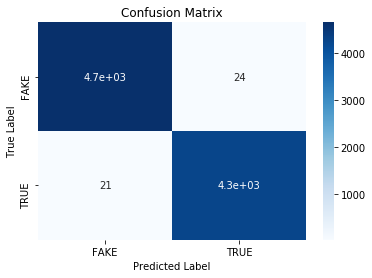

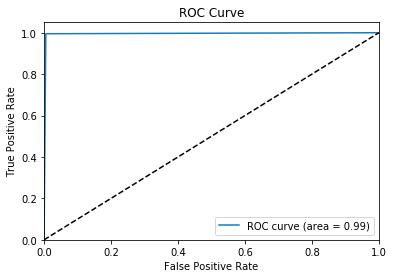

[[4651   24]
 [  21 4284]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4675
           1       0.99      1.00      0.99      4305

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [99]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred, labels=['FAKE','TRUE'])



import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# define labels
labels=['FAKE','TRUE']

# define confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=labels)

# build dataframe
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# plot confusion matrix
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Convert labels to binary

y_pred[y_pred == 'TRUE'] = 1
y_pred[y_pred == 'FAKE'] = 0
y_pred = y_pred.astype(int)
y_test[y_test == 'TRUE'] = 1
y_test[y_test == 'FAKE'] = 0
y_test = y_test.astype(int)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

In [100]:
true_samples

,title,text,subject,date,Label
12708,Trump's Jerusalem plan revives tensions in EU ...,PARIS/BRUSSELS (Reuters) - France said on Frid...,worldnews,"December 8, 2017",TRUE
14482,Australian medical group wants access to Manus...,MELBOURNE (Reuters) - Australia s main medical...,worldnews,"November 18, 2017",TRUE
8479,Trump settles legal dispute with former campai...,(Reuters) - Republican presidential nominee Do...,politicsNews,"August 11, 2016",TRUE
2283,Van Niekerk forced to work his way to tantaliz...,LONDON (Reuters) - Wayde van Niekerk duly qual...,politicsNews,"August 6, 2017",TRUE
8714,"Protesters face off in downtown Cleveland, sep...",(Reuters) - Protesters for and against Trump f...,politicsNews,"July 18, 2016",TRUE
7047,Clinton team to take part in U.S. state vote r...,"WASHINGTON/WEST PAlM BEACH, Fla. (Reuters) - D...",politicsNews,"November 26, 2016",TRUE
3201,Baseball field shooting shakes American symbol...,WASHINGTON (Reuters) - The gunshots that rippe...,politicsNews,"June 14, 2017",TRUE
7495,Trump on accepting election results: 'see how ...,WASHINGTON (Reuters) - Republican U.S. preside...,politicsNews,"November 8, 2016",TRUE
9251,Ruling against ex-AIG boss Greenberg raises st...,NEW YORK (Reuters) - A ruling by New York’s hi...,politicsNews,"June 7, 2016",TRUE
1054,Iowa Supreme Court puts state's abortion waiti...,(Reuters) - The Iowa Supreme Court has maintai...,politicsNews,"October 24, 2017",TRUE


In [105]:
tfidf_sampleTrue=tfidf_vectorizer.transform(true_samples['text'])
true_result = pac.predict(tfidf_sampleTrue)
# print(list(true_result))
print("Correct Real News Articles",len(true_result[true_result == 'TRUE']), 'out of',len(true_samples),' samples')


tfidf_sampleFalse=tfidf_vectorizer.transform(false_samples['text'])
fake_result = pac.predict(tfidf_sampleFalse)
print("Fake News Articles",len(fake_result[fake_result == 'FAKE']),'out of',len(false_samples),' samples')


Correct Real News Articles 10 out of 10  samples
Fake News Articles 10 out of 10  samples
